### Read in the data, store into a dataframe, and convert categorical variables

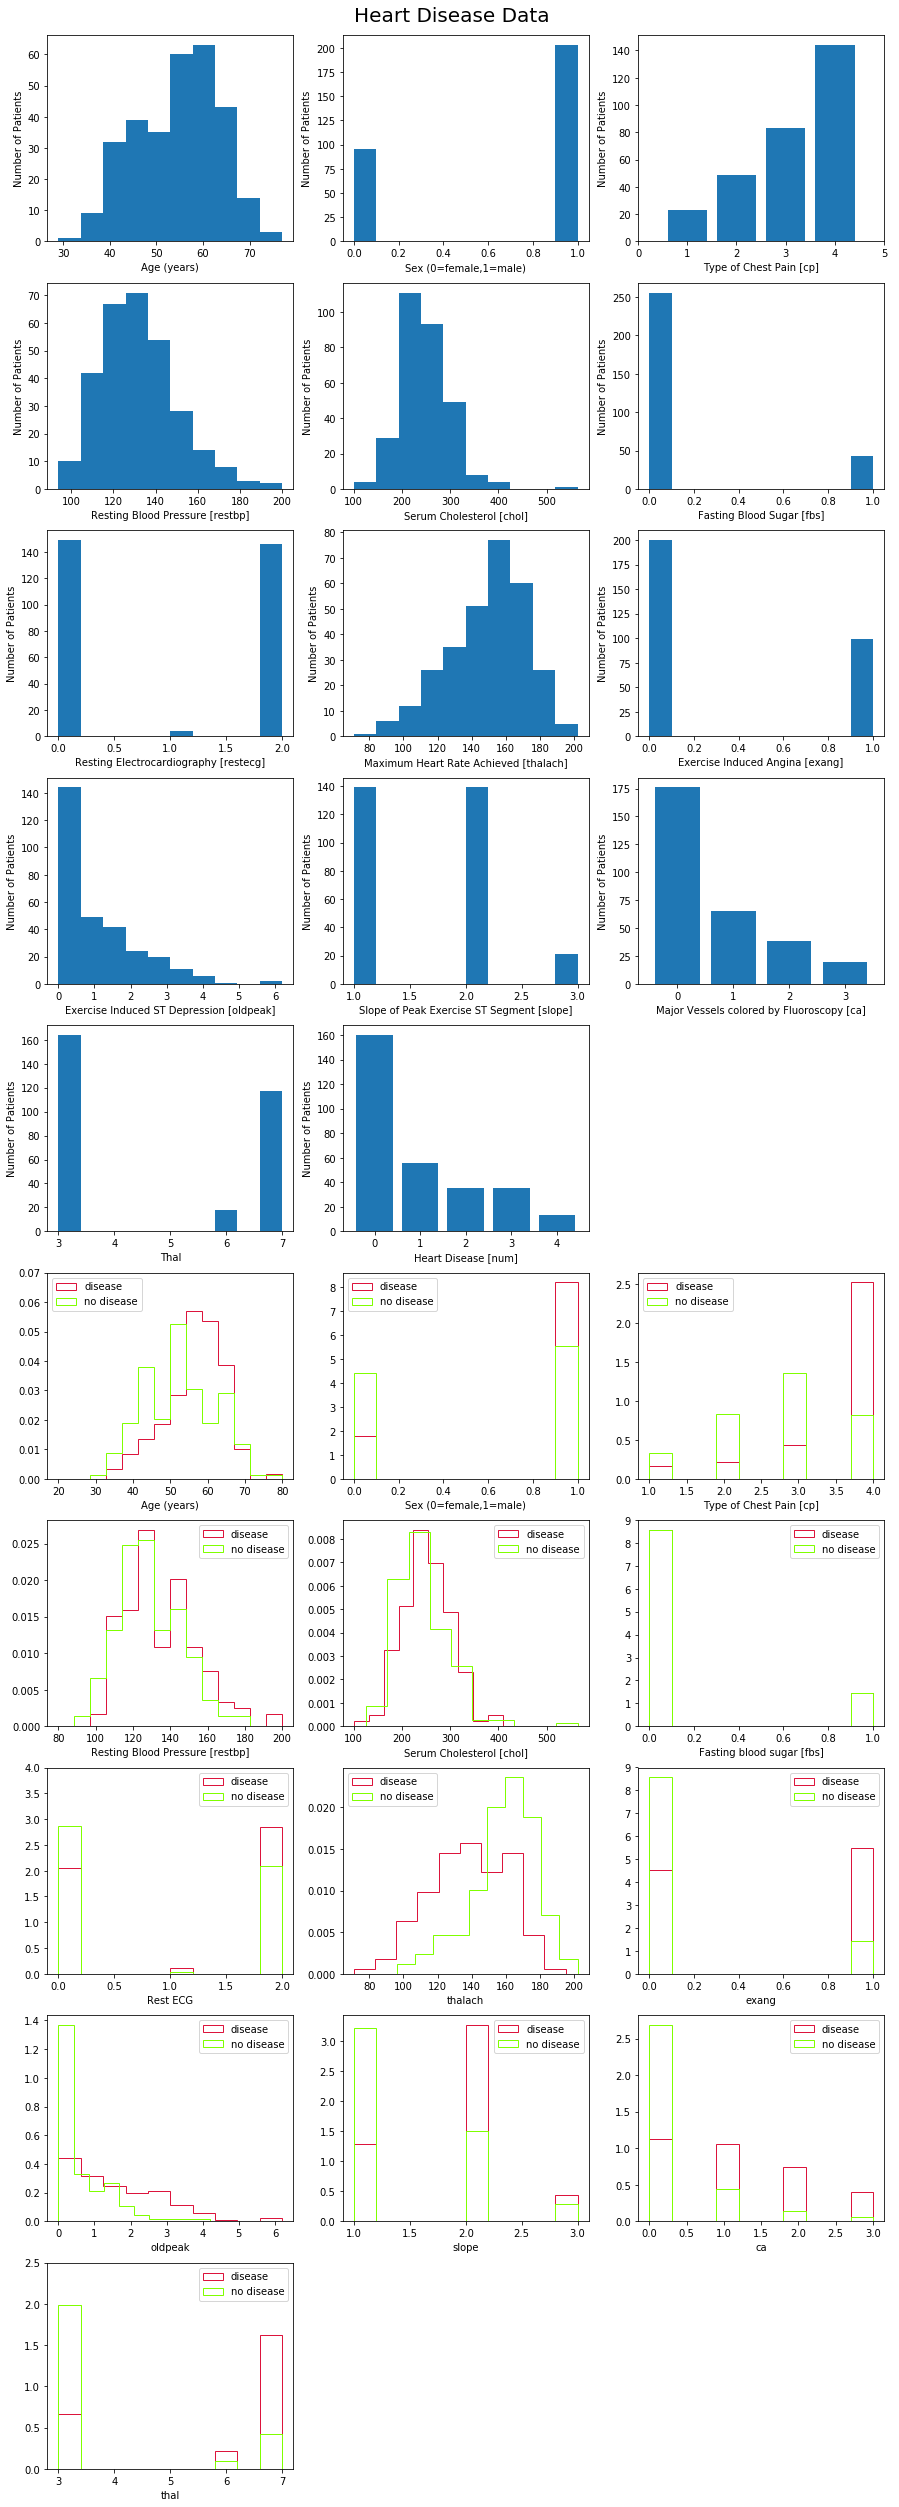

Intrinsic discrepancies between disease and no-disease, in decreasing order: 
   0.609044  (thal)
   0.584354  (cp)
   0.478634  (ca)
   0.456496  (thalach)
   0.420033  (oldpeak)
   0.352659  (exang)
   0.312049  (slope)
   0.198552  (age)
   0.156002  (sex)
   0.058716  (restecg)
   0.033252  (restbp)
   0.030527  (chol)
   0.000000  (fbs)

Number of patients in dataframe: 299, with disease: 139, without disease: 160

    age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca   hd  cp_1  \
0  63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0  0.0     1   
1  67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0  1.0     0   
2  67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0  1.0     0   
3  37.0  1.0   130.0  250.0  0.0    187.0    0.0      3.5  0.0  0.0     0   
4  41.0  0.0   130.0  204.0  0.0    172.0    0.0      1.4  0.0  0.0     0   

   cp_2  cp_3  recg_1  recg_2  slope_1  slope_3  thal_6  thal_7  
0     0     0       0       1        0        1

In [1]:
'''
List of available variables:

 1. age: continuous
 2. sex: categorical, 2 values {0: female, 1: male}
 3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
 4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
 5. chol (serum cholesterol level): continuous (mg/dl)
 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 8. thalach (maximum heart rate achieved): continuous
 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. num (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}
    
The actual number of feature variables (after converting categorical variables
to dummy ones) is: 
1 (age) + 1 (sex) + 3 (cp) + 1 (restbp) + 1 (chol) + 1 (fbs) + 2 (restecg) + 
1 (thalach) + 1 (exang) + 1 (oldpeak) + 2 (slope) + 1 (ca) + 2 (thal) = 18

The response variable (num) is categorical with 5 values, but we don't have
enough data to predict all the categories. Therefore we'll replace num with:
14. hd (heart disease): categorical, 2 values {0: no, 1: yes}
'''
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint

# Given two histograms x and y (with the same range and binning), the following function
# calculates the intrinsic discrepancy (a symmetrized Kullback-Leibler distance) between them.
def intrinsic_discrepancy(x,y):
    assert len(x)==len(y)
    sumx = sum(xval for xval in x)
    sumy = sum(yval for yval in y)
    id1  = 0.0
    id2  = 0.0
    for (xval,yval) in zip(x,y):
        if (xval>0) and (yval>0):
            id1 += (float(xval)/sumx) * np.log((float(xval)/sumx)/(float(yval)/sumy))
            id2 += (float(yval)/sumy) * np.log((float(yval)/sumy)/(float(xval)/sumx))
    return min(id1,id2)

# Create Pandas dataframe.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df0     = pd.read_table("data/heart_disease_all14.csv", sep=',', header=None, names=columns)
#df0.head()
# Make some plots to check the data
fig, axes = plt.subplots( nrows=10, ncols=3, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Data", fontsize=20)
axes[0,0].hist(df0.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(df0.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[0,2].hist(df0.cp,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].set_ylabel("Number of Patients")
axes[1,0].hist(df0.restbp)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(df0.chol)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].set_ylabel("Number of Patients")
axes[1,2].hist(df0.fbs)
axes[1,2].set_xlabel("Fasting Blood Sugar [fbs]")
axes[1,2].set_ylabel("Number of Patients")
axes[2,0].hist(df0.restecg)
axes[2,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(df0.thalach)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[2,1].set_ylabel("Number of Patients")
axes[2,2].hist(df0.exang)
axes[2,2].set_xlabel("Exercise Induced Angina [exang]")
axes[2,2].set_ylabel("Number of Patients")
axes[3,0].hist(df0.oldpeak)
axes[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[3,0].set_ylabel("Number of Patients")
axes[3,1].hist(df0.slope)
axes[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,1].set_ylabel("Number of Patients")
axes[3,2].hist(df0.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[3,2].set_xlim(-0.7,3.7)
axes[3,2].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[3,2].set_ylabel("Number of Patients")
axes[4,0].hist(df0.thal)
axes[4,0].set_xlabel("Thal")
axes[4,0].set_ylabel("Number of Patients")
axes[4,1].hist(df0.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[4,1].set_xlabel("Heart Disease [num]")
axes[4,1].set_ylabel("Number of Patients")
axes[4,2].axis("off")

# Marginal feature distributions compared for disease and no-disease (likelihoods)
bins = np.linspace(20, 80, 15)
axes[5,0].hist(df0[df0.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,0].hist(df0[df0.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,0].set_xlabel("Age (years)")
axes[5,0].set_ylim(0.0,0.070)
axes[5,0].legend(prop={'size': 10},loc="upper left")
axes[5,1].hist(df0[df0.num>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,1].hist(df0[df0.num==0].sex,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,1].set_xlabel("Sex (0=female,1=male)")
axes[5,1].legend(prop={'size': 10},loc="upper left")
axes[5,2].hist(df0[df0.num>0].cp.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,2].hist(df0[df0.num==0].cp,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,2].set_xlabel("Type of Chest Pain [cp]")
axes[5,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axes[6,0].hist(df0[df0.num>0].restbp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,0].hist(df0[df0.num==0].restbp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[6,0].legend(prop={'size': 10},loc="upper right")
axes[6,1].hist(df0[df0.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,1].hist(df0[df0.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,1].set_xlabel("Serum Cholesterol [chol]")
axes[6,1].legend(prop={'size': 10},loc="upper right")
axes[6,2].hist(df0[df0.num>0].fbs.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,2].hist(df0[df0.num==0].fbs,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,2].set_xlabel("Fasting blood sugar [fbs]")
axes[6,2].legend(prop={'size': 10},loc="upper right")
axes[7,0].hist(df0[df0.num>0].restecg.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,0].hist(df0[df0.num==0].restecg,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,0].set_xlabel("Rest ECG")
axes[7,0].set_ylim(0.0,4.0)
axes[7,0].legend(prop={'size': 10},loc="upper right")
axes[7,1].hist(df0[df0.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,1].hist(df0[df0.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,1].set_xlabel("thalach")
axes[7,1].legend(prop={'size': 10},loc="upper left")
axes[7,2].hist(df0[df0.num>0].exang.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,2].hist(df0[df0.num==0].exang,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,2].set_xlabel("exang")
axes[7,2].legend(prop={'size': 10},loc="upper right")
axes[8,0].hist(df0[df0.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,0].hist(df0[df0.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,0].set_xlabel("oldpeak")
axes[8,0].legend(prop={'size': 10},loc="upper right")
axes[8,1].hist(df0[df0.num>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,1].hist(df0[df0.num==0].slope,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,1].set_xlabel("slope")
axes[8,1].legend(prop={'size': 10},loc="upper right")
axes[8,2].hist(df0[df0.num>0].ca.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,2].hist(df0[df0.num==0].ca,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,2].set_xlabel("ca")
axes[8,2].legend(prop={'size': 10},loc="upper right")
axes[9,0].hist(df0[df0.num>0].thal.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[9,0].hist(df0[df0.num==0].thal,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[9,0].set_xlabel("thal")
axes[9,0].set_ylim(0.0,2.5)
axes[9,0].legend(prop={'size': 10},loc="upper right")
axes[9,1].axis("off")
axes[9,2].axis("off")
plt.show()

# Compute intrinsic discrepancies between disease and no-disease feature distributions
int_discr = {}
hist,bin_edges   = np.histogram(df0.age,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].age,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].age,bins=bin_edges,density=False)
int_discr["age"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].sex,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].sex,bins=(-0.5,0.5,1.5),density=False)
int_discr["sex"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].cp,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].cp,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
int_discr["cp"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df0.restbp,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].restbp,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].restbp,bins=bin_edges,density=False)
int_discr["restbp"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df0.chol,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].chol,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].chol,bins=bin_edges,density=False)
int_discr["chol"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].fbs,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].fbs,bins=(-0.5,0.5,1.5),density=False)
int_discr["fbs"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].restecg,bins=(-0.5,0.5,1.5,2.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].restecg,bins=(-0.5,0.5,1.5,2.5),density=False)
int_discr["restecg"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df0.thalach,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].thalach,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].thalach,bins=bin_edges,density=False)
int_discr["thalach"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].exang,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].exang,bins=(-0.5,0.5,1.5),density=False)
int_discr["exang"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df0.oldpeak,density=False)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].oldpeak,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].oldpeak,bins=bin_edges,density=False)
int_discr["oldpeak"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
int_discr["slope"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].ca,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].ca,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
int_discr["ca"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df0[df0.num>0].thal,bins=(2.5,3.5,6.5,7.5),density=False)
hist2,bin_edges2 = np.histogram(df0[df0.num==0].thal,bins=(2.5,3.5,6.5,7.5),density=False)
int_discr["thal"] = intrinsic_discrepancy(hist1,hist2)
id_list = Counter(int_discr).most_common()
print 'Intrinsic discrepancies between disease and no-disease, in decreasing order: '
for item in id_list:
    print '   %f  (%s)' % (item[1],item[0])

# Convert categorical variables with more than two values into dummy variables.
# Note that variable ca is discrete but not categorical, so we don't convert it.
df      = df0.copy()
dummies = pd.get_dummies(df["cp"],prefix="cp")
df      = df.join(dummies)
del df["cp"]
del df["cp_4.0"]
df      = df.rename(columns = {"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies = pd.get_dummies(df["restecg"],prefix="recg")
df      = df.join(dummies)
del df["restecg"]
del df["recg_0.0"]
df      = df.rename(columns = {"recg_1.0":"recg_1","recg_2.0":"recg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df      = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df      = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["thal"],prefix="thal")
df      = df.join(dummies)
del df["thal"]
del df["thal_3.0"]
df      = df.rename(columns = {"thal_6.0":"thal_6","thal_7.0":"thal_7"})

# Replace response variable values and rename
df["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df      = df.rename(columns = {"num":"hd"})

# New list of column labels after the above operations
new_columns_1 = ["age", "sex", "restbp", "chol", "fbs", "thalach", 
                 "exang", "oldpeak", "ca", "hd", "cp_1", "cp_2",
                 "cp_3", "recg_1", "recg_2", "slope_1", "slope_3",
                 "thal_6", "thal_7"]

print '\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.hd==1].index),len(df[df.hd==0].index))
print df.head()
#print df.describe()

# Standardize the dataframe
stdcols = ["age","restbp","chol","thalach","oldpeak"]
nrmcols = ["ca"]
stddf   = df.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists for use by classifiers
yall = stddf["hd"]
Xall = stddf[new_columns_2[1:]].values
print type(yall)
print type(Xall)
print df.head()

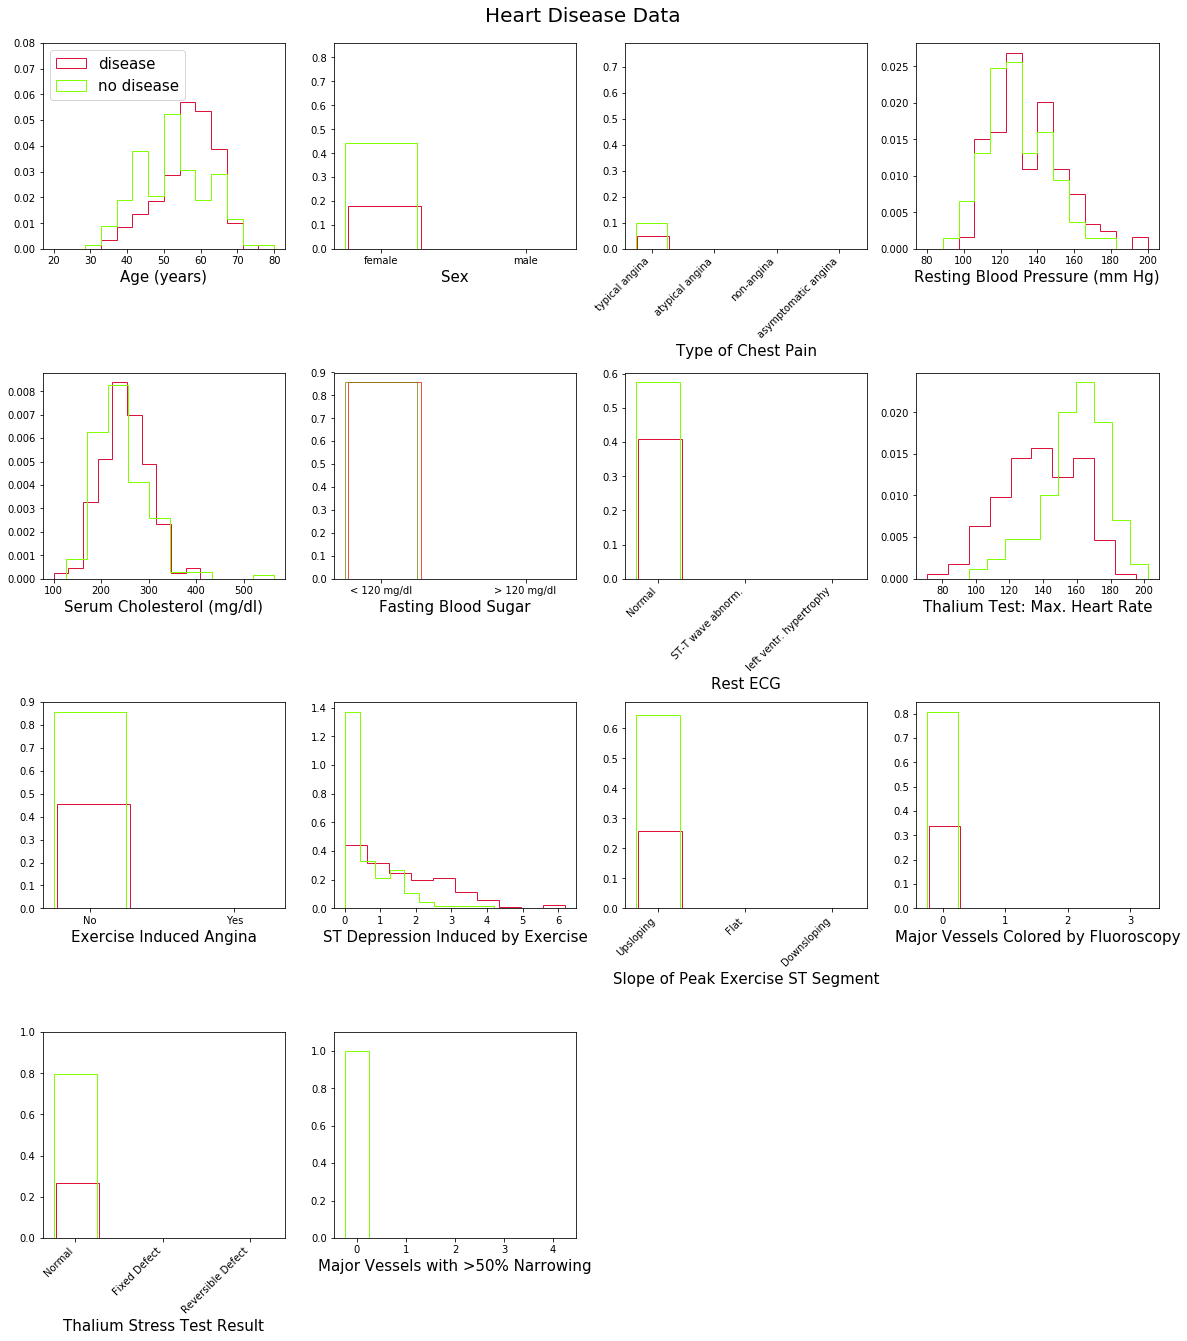

In [2]:

fig, axes = plt.subplots( nrows=4, ncols=4, figsize=(20,20) )
plt.subplots_adjust( wspace=0.20, hspace=0.60, top=0.955)
plt.suptitle("Heart Disease Data", fontsize=20)

bins = np.linspace(20, 80, 15)
axes[0,0].hist(df0[df0.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,0].hist(df0[df0.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,0].set_xlabel("Age (years)",fontsize=15)
axes[0,0].set_ylim(0.0,0.080)
axes[0,0].legend(prop={'size': 15},loc="upper left")

bins     = np.arange(2)
width    = 0.5
heights1 = df0[df0.num>0]["sex"].groupby(df0["sex"]).count()
heights2 = df0[df0.num==0]["sex"].groupby(df0["sex"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[0,1].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[0,1].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[0,1].set_xlabel("Sex",fontsize=15)
axes[0,1].set_xticks(bins)
axes[0,1].set_xticklabels(["female","male"],ha="center")

bins     = np.arange(4)
width    = 0.5
heights1 = df0[df0.num>0]["cp"].groupby(df0["cp"]).count()
heights2 = df0[df0.num==0]["cp"].groupby(df0["cp"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[0,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[0,2].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[0,2].set_xlabel("Type of Chest Pain",fontsize=15)
axes[0,2].set_xticks(bins)
axes[0,2].set_xticklabels(["typical angina", "atypical angina", "non-angina", "asymptomatic angina"],
                          ha="right",rotation=45.)

bins = np.linspace(80, 200, 15)
axes[0,3].hist(df0[df0.num>0].restbp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,3].hist(df0[df0.num==0].restbp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,3].set_xlabel("Resting Blood Pressure (mm Hg)",fontsize=15)

axes[1,0].hist(df0[df0.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,0].hist(df0[df0.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,0].set_xlabel("Serum Cholesterol (mg/dl)",fontsize=15)

bins     = np.arange(2)
width    = 0.5
heights1 = df0[df0.num>0]["fbs"].groupby(df0["fbs"]).count()
heights2 = df0[df0.num==0]["fbs"].groupby(df0["fbs"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[1,1].bar(bins+0.025,heights1,width,align="center",edgecolor=(0.917,0.083,0,0.75),color=["none"],label="disease")
axes[1,1].bar(bins,heights2,width,align="center",edgecolor=(0.467,0.533,0,0.75),color=["none"],label="no disease")
axes[1,1].set_xlabel("Fasting Blood Sugar",fontsize=15)
axes[1,1].set_xticks(bins)
axes[1,1].set_xticklabels(["< 120 mg/dl","> 120 mg/dl"],ha="center")

bins     = np.arange(3)
width    = 0.5
heights1 = df0[df0.num>0]["restecg"].groupby(df0["restecg"]).count()
heights2 = df0[df0.num==0]["restecg"].groupby(df0["restecg"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[1,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[1,2].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[1,2].set_xlabel("Rest ECG",fontsize=15)
axes[1,2].set_xticks(bins)
axes[1,2].set_xticklabels(["Normal","ST-T wave abnorm.","left ventr. hypertrophy"],ha="right",rotation=45.)

axes[1,3].hist(df0[df0.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,3].hist(df0[df0.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,3].set_xlabel("Thalium Test: Max. Heart Rate",fontsize=15)

bins     = np.arange(2)
width    = 0.5
heights1 = df0[df0.num>0]["exang"].groupby(df0["exang"]).count()
heights2 = df0[df0.num==0]["exang"].groupby(df0["exang"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[2,0].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[2,0].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[2,0].set_xlabel("Exercise Induced Angina",fontsize=15)
axes[2,0].set_xticks(bins)
axes[2,0].set_xticklabels(["No","Yes"],ha="center")

axes[2,1].hist(df0[df0.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,1].hist(df0[df0.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,1].set_xlabel("ST Depression Induced by Exercise", fontsize=15)

bins     = np.arange(3)
width    = 0.5
heights1 = df0[df0.num>0]["slope"].groupby(df0["slope"]).count()
heights2 = df0[df0.num==0]["slope"].groupby(df0["slope"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[2,2].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[2,2].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[2,2].set_xlabel("Slope of Peak Exercise ST Segment",fontsize=15)
axes[2,2].set_xticks(bins)
axes[2,2].set_xticklabels(["Upsloping","Flat","Downsloping"],ha="right",rotation=45.)

bins     = np.arange(4)
width    = 0.5
heights1 = df0[df0.num>0]["ca"].groupby(df0["ca"]).count()
heights2 = df0[df0.num==0]["ca"].groupby(df0["ca"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[2,3].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[2,3].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[2,3].set_xlabel("Major Vessels Colored by Fluoroscopy",fontsize=15)
axes[2,3].set_xticks(bins)
axes[2,3].set_xticklabels(["0","1","2","3"],ha="center")

bins     = np.arange(3)
width    = 0.5
heights1 = df0[df0.num>0]["thal"].groupby(df0["thal"]).count()
heights2 = df0[df0.num==0]["thal"].groupby(df0["thal"]).count()
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[3,0].bar(bins+0.025,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[3,0].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[3,0].set_xlabel("Thalium Stress Test Result",fontsize=15)
axes[3,0].set_xticks(bins)
axes[3,0].set_xticklabels(["Normal","Fixed Defect","Reversible Defect"],ha="right",rotation=45.)
axes[3,0].set_ylim(0.0,1.0)

bins     = np.arange(5)
width    = 0.5
heights1 = np.array(map(float,[0]+df0[df0.num>0]["num"].groupby(df0["num"]).count().tolist()))
heights2 = np.array(map(float,df0[df0.num==0]["num"].groupby(df0["num"]).count().tolist()+[0,0,0,0]))
heights1 = heights1/sum(heights1)
heights2 = heights2/sum(heights2)
axes[3,1].bar(bins,heights1,width,align="center",edgecolor=["crimson"],color=["none"],label="disease")
axes[3,1].bar(bins,heights2,width,align="center",edgecolor=["chartreuse"],color=["none"],label="no disease")
axes[3,1].set_xlabel("Major Vessels with >50% Narrowing",fontsize=15)
axes[3,1].set_xticks(bins)
axes[3,1].set_xticklabels(["0","1","2","3","4"],ha="center")
axes[3,1].set_ylim(0.0,1.1)

axes[3,2].axis("off")
axes[3,3].axis("off")

plt.show()
#fig.savefig("mcnulty_fig1.png")

### Logistic Regression

In [5]:
'''
In the following couple of cells we do a fit to the heart-disease data
with all features included, first with scikit-learn, then with statsmodels.
Let's make sure we understand what we are doing by obtaining the same results
with both software packages.
'''
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

lasso = False

nfeatures = len(stddf.columns)
if lasso:           # lasso regularization
    penalty = "l1"
    cval    = 1.0
    alpha   = [1.0]*nfeatures
else:               # no regularization
    penalty = "l1"
    cval    = 1000.0
    alpha   = 0.0

model = LogisticRegression(fit_intercept=True,penalty=penalty,dual=False,C=cval)
print(model)
lrfit = model.fit(Xall,yall)
print('\nLogisticRegression score on full data set: %f\n' % lrfit.score(Xall,yall))
ypred = model.predict(Xall)
print '\nClassification report on full data set:'
print(metrics.classification_report(yall,ypred))
print '\nConfusion matrix:'
print(metrics.confusion_matrix(yall,ypred))
print '\nLogisticRegression coefficients:'
coeff = model.coef_.tolist()[0]
for index in range(len(coeff)):
    print '%s : %8.5f' % (new_columns_2[index+1].rjust(9),coeff[index])
print 'Intercept : %f' %model.intercept_

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression score on full data set: 0.872910


Classification report on full data set:
             precision    recall  f1-score   support

        0.0       0.86      0.91      0.88       160
        1.0       0.89      0.83      0.86       139

avg / total       0.87      0.87      0.87       299


Confusion matrix:
[[146  14]
 [ 24 115]]

LogisticRegression coefficients:
      age : -0.12376
      sex :  1.54802
   restbp :  0.43324
     chol :  0.22069
      fbs : -0.59472
  thalach : -0.41717
    exang :  0.71830
  oldpeak :  0.41976
       ca :  3.92904
     cp_1 : -2.10062
     cp_2 : -0.84590
     cp_3 : -1.85016
   recg_1 :  0.77506
   recg_2 :  0.46873
  slope_1 : -1.16430
  slope_3 : -0.64692
   thal_6 

In [6]:
'''
Now with statsmodels
'''
import pandas as pd
import statsmodels.api as sm

df1              = stddf.copy()
df1["intercept"] = 1.0

train_cols = df1[df1.columns[1:]]
response   = df1[df1.columns[0]]
model      = sm.Logit(response, train_cols, missing="raise")
 
# fit the model
print('\nNumber of features in model: %i' %nfeatures)
print('Lasso = %s' % lasso)
if lasso: print('alpha=%s' %alpha)
print(" ")

if lasso:
    result = model.fit_regularized(method=penalty, alpha=alpha, disp=1)
else:
    result = model.fit(method="newton", maxiter=100, disp=1)

print result.summary()


Number of features in model: 19
Lasso = False
 
Optimization terminated successfully.
         Current function value: 0.321016
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                     hd   No. Observations:                  299
Model:                          Logit   Df Residuals:                      280
Method:                           MLE   Df Model:                           18
Date:                Wed, 17 Jan 2018   Pseudo R-squ.:                  0.5352
Time:                        10:38:03   Log-Likelihood:                -95.984
converged:                       True   LL-Null:                       -206.51
                                        LLR p-value:                 5.920e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.1238      0.223     -0.554      0.579     

In [7]:
'''
The previous two cells demonstrate that we can obtain the same results
with scikit-learn and statsmodels.  However, the results show a problem:
the fit coefficient of the "age" feature is negative, indicating that 
the risk of heart disease might decrease with age!  This must be the 
result of a correlation effect, because when we fit age alone the coefficient
is positive (see also the plot of the marginal distributions of age at the
beginning).  To see where the correlation comes from, we are going to repeat
the fit by adding one feature at a time to the age feature, until the sign
of the age fit coefficient flips from + to -.
'''
import pandas as pd
import statsmodels.api as sm
import itertools

print('\nNumber of Features = %i\n' %(nfeatures))
iterable   = range(2,nfeatures)
for s in xrange(len(iterable)+1,0,-1):
    for comb in itertools.combinations(iterable, s):
        dropped_columns  = list(comb)
        df1              = stddf.copy()
        df1              = df1.drop(df1.columns[dropped_columns],axis=1) 
#        df1["intercept"] = 1.0
        train_cols       = df1[df1.columns[1:]]
        response         = df1[df1.columns[0]]
        model            = sm.Logit(response, train_cols)
        if lasso:
            result = model.fit_regularized(method=penalty, alpha=alpha, disp=0)
        else:
            result = model.fit(method="newton", maxiter=100, disp=0)
        print 'With the columns %s, "age" coefficient = %f +/- %f' \
        % (list(df1.columns[1:].values),result.params[0],result.bse[0])
        if result.params[0] < 0.0:
            break
    else:
        continue
    break


Number of Features = 19

With the columns ['age'], "age" coefficient = 0.465889 +/- 0.123370
With the columns ['age', 'thal_7'], "age" coefficient = 0.445439 +/- 0.127149
With the columns ['age', 'thal_6'], "age" coefficient = 0.458219 +/- 0.123435
With the columns ['age', 'slope_3'], "age" coefficient = 0.464302 +/- 0.123360
With the columns ['age', 'slope_1'], "age" coefficient = 0.429446 +/- 0.130818
With the columns ['age', 'recg_2'], "age" coefficient = 0.458366 +/- 0.123785
With the columns ['age', 'recg_1'], "age" coefficient = 0.460071 +/- 0.123772
With the columns ['age', 'cp_3'], "age" coefficient = 0.490671 +/- 0.130007
With the columns ['age', 'cp_2'], "age" coefficient = 0.421323 +/- 0.127308
With the columns ['age', 'cp_1'], "age" coefficient = 0.487567 +/- 0.125792
With the columns ['age', 'ca'], "age" coefficient = 0.142862 +/- 0.140091
With the columns ['age', 'oldpeak'], "age" coefficient = 0.340596 +/- 0.133474
With the columns ['age', 'exang'], "age" coefficient = 

##### Conclusions:

* Fitting age alone gives a positive coefficient, as expected.
* It takes at least two additional features to cause the age coefficient to turn negative (for example "thalach" and "ca").  However the negative age coefficient is not significantly different from 0.

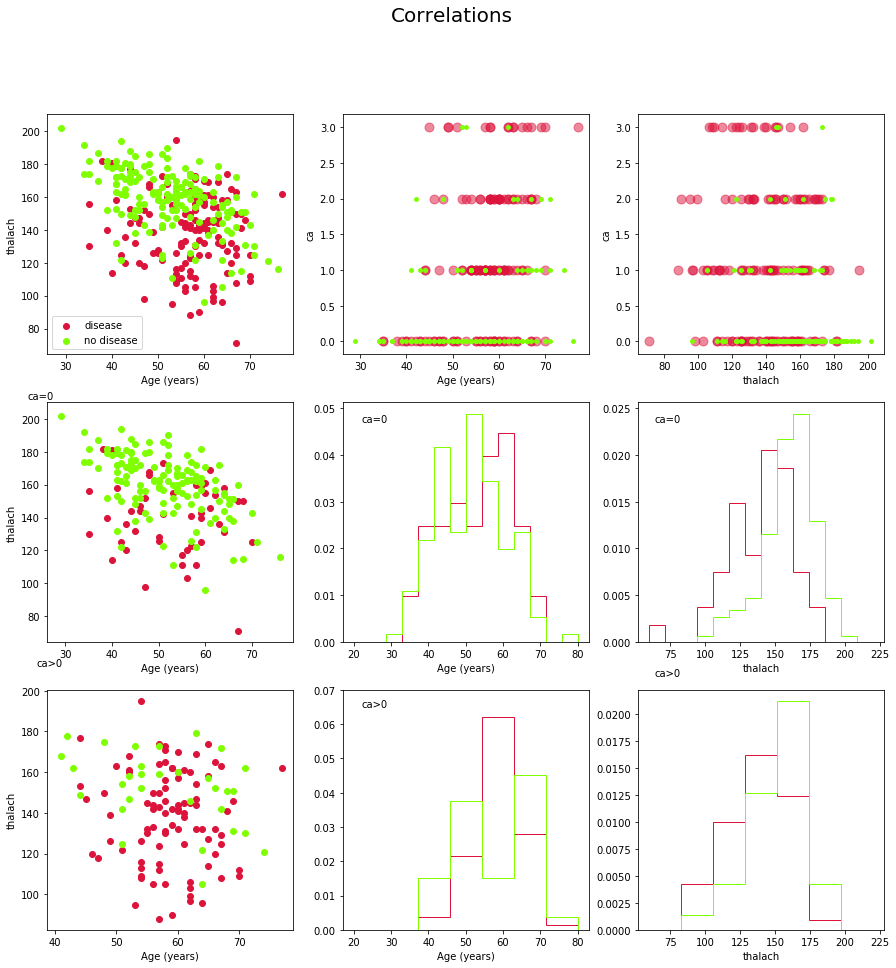

In [8]:
'''
Make correlation plots for the features age, thalach, and ca.
'''
import numpy as np

fig, axes = plt.subplots( nrows=3, ncols=3, figsize=(15,15) )
plt.suptitle("Correlations", fontsize=20)
axes[0,0].scatter(df[df.hd==1].age,df[df.hd==1].thalach,color=["crimson"],label="disease")
axes[0,0].scatter(df[df.hd==0].age,df[df.hd==0].thalach,color=["chartreuse"],label="no disease")
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("thalach")
axes[0,0].legend(prop={'size': 10},loc="lower left")
axes[0,1].scatter(df[df.hd==1].age,df[df.hd==1].ca,color=["crimson"],s=80,alpha=0.5,label="disease")
axes[0,1].scatter(df[df.hd==0].age,df[df.hd==0].ca,color=["chartreuse"],s=15,label="no disease")
axes[0,1].set_xlabel("Age (years)")
axes[0,1].set_ylabel("ca")
axes[0,2].scatter(df[df.hd==1].thalach,df[df.hd==1].ca,color=["crimson"],s=80,alpha=0.5,label="disease")
axes[0,2].scatter(df[df.hd==0].thalach,df[df.hd==0].ca,color=["chartreuse"],s=15,label="no disease")
axes[0,2].set_xlabel("thalach")
axes[0,2].set_ylabel("ca")
axes[1,0].scatter(df[(df.hd==1)&(df.ca==0)].age,df[(df.hd==1)&(df.ca==0)].thalach,\
                  color=["crimson"],label="disease")
axes[1,0].scatter(df[(df.hd==0)&(df.ca==0)].age,df[(df.hd==0)&(df.ca==0)].thalach,\
                  color=["chartreuse"],label="no disease")
axes[1,0].text(22.0,212.0,"ca=0")
axes[1,0].set_xlabel("Age (years)")
axes[1,0].set_ylabel("thalach")
bins = np.linspace(20, 80, 15)
axes[1,1].hist(df[(df.hd==1)&(df.ca==0)].age.tolist(),bins,color=["crimson"],\
               histtype="step",normed=True,label="disease")
axes[1,1].hist(df[(df.hd==0)&(df.ca==0)].age.tolist(),bins,color=["chartreuse"],\
               histtype="step",normed=True,label="no disease")
axes[1,1].text(22.0,0.047,"ca=0")
axes[1,1].set_xlabel("Age (years)")
bins = np.linspace(60, 220, 15)
axes[1,2].hist(df[(df.hd==1)&(df.ca==0)].thalach.tolist(),bins,color=["crimson"],\
               histtype="step",normed=True,label="disease")
axes[1,2].hist(df[(df.hd==0)&(df.ca==0)].thalach.tolist(),bins,color=["chartreuse"],\
               histtype="step",normed=True,label="no disease")
axes[1,2].text(64.0,0.0235,"ca=0")
axes[1,2].set_xlabel("thalach")
axes[2,0].scatter(df[(df.hd==1)&(df.ca>0)].age,df[(df.hd==1)&(df.ca>0)].thalach,\
                  color=["crimson"],label="disease")
axes[2,0].scatter(df[(df.hd==0)&(df.ca>0)].age,df[(df.hd==0)&(df.ca>0)].thalach,\
                  color=["chartreuse"],label="no disease")
axes[2,0].text(37.0,212.0,"ca>0")
axes[2,0].set_xlabel("Age (years)")
axes[2,0].set_ylabel("thalach")
bins = np.linspace(20, 80, 8)
axes[2,1].hist(df[(df.hd==1)&(df.ca>0)].age.tolist(),bins,color=["crimson"],\
               histtype="step",normed=True,label="disease")
axes[2,1].hist(df[(df.hd==0)&(df.ca>0)].age.tolist(),bins,color=["chartreuse"],\
               histtype="step",normed=True,label="no disease")
axes[2,1].text(22.0,0.065,"ca>0")
axes[2,1].set_xlabel("Age (years)")
axes[2,1].set_ylim(0.0,0.07)
bins = np.linspace(60, 220, 8)
axes[2,2].hist(df[(df.hd==1)&(df.ca>0)].thalach.tolist(),bins,color=["crimson"],\
               histtype="step",normed=True,label="disease")
axes[2,2].hist(df[(df.hd==0)&(df.ca>0)].thalach.tolist(),bins,color=["chartreuse"],\
               histtype="step",normed=True,label="no disease")
axes[2,2].text(64.0,0.0235,"ca>0")
axes[2,2].set_xlabel("thalach")
plt.show()

In [9]:
'''
Fit using only the age and thalach features, separately for ca=0 and ca>0.
'''
import pandas as pd
import statsmodels.api as sm

dropped_columns  = [2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18] # Drop all features except 1 (age) and 6 (thalach).

# Fit for ca=0 first (ca<0 is equivalent):
df1        = stddf.copy()
df1        = df1[df1.ca<0]
df1        = df1.drop(df1.columns[dropped_columns],axis=1) 
train_cols = df1[df1.columns[1:]]
response   = df1[df1.columns[0]]
model      = sm.Logit(response, train_cols)
if lasso:
    result = model.fit_regularized(method=penalty, alpha=alpha, disp=0)
else:
    result = model.fit(method="newton", maxiter=100, disp=0)
print('\nFit results with ca<0\n')
print result.summary()

# Now fit for ca>0:
df1        = stddf.copy()
df1        = df1[df1.ca>0]
df1        = df1.drop(df1.columns[dropped_columns],axis=1) 
train_cols = df1[df1.columns[1:]]
response   = df1[df1.columns[0]]
model      = sm.Logit(response, train_cols)
if lasso:
    result = model.fit_regularized(method=penalty, alpha=alpha, disp=0)
else:
    result = model.fit(method="newton", maxiter=100, disp=0)
print('\nFit results with ca>0 and Lasso = %s\n' %lasso)
print result.summary()


Fit results with ca<0

                           Logit Regression Results                           
Dep. Variable:                     hd   No. Observations:                  176
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Jan 2018   Pseudo R-squ.:                 0.01383
Time:                        10:42:39   Log-Likelihood:                -100.72
converged:                       True   LL-Null:                       -102.13
                                        LLR p-value:                   0.09284
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0393      0.182     -0.216      0.829      -0.396       0.318
thalach       -1.2219      0.233     -5.242      0.000      -1.679      -0.765

Fit results with ca>0 and L

##### Conclusions:
* For ca=0 the age coefficient is negative but not significant.
* For ca>0 the age coefficient is positive and almost significant.
* In both cases the thalach coefficient is negative and significant.

In [9]:
'''
Select features to keep: Method 1
Optimize logistic regression on accuracy score, using cross-validation.
Here we use sklearn since it includes a cross_validation method.
'''
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import itertools
from pprint import pprint

best_score = []
best_std   = []
best_comb  = []
nfeatures  = 18
iterable   = range(nfeatures)
for intercept in [True,False]:
    model  = LogisticRegression(fit_intercept=intercept,penalty=penalty,dual=False,C=cval)
    for s in xrange(len(iterable)+1):
        for comb in itertools.combinations(iterable, s):
            if len(comb) > 0:
                Xsel = []
                for patient in Xall:
                    Xsel.append([patient[ind] for ind in comb])
                this_scores = cross_val_score(model, Xsel, y=yall, cv=10 )
                score_mean  = np.mean(this_scores)
                score_std   = np.std(this_scores)
                comb1       = list(comb)
                if intercept: comb1.append(nfeatures)
                if len(best_score) > 0: 
                    if score_mean > best_score[0]:
                        best_score = []
                        best_std   = []
                        best_comb  = []
                        best_score.append(score_mean)
                        best_std.append(score_std)
                        best_comb.append(comb1)
                    elif score_mean == best_score[0]:
                        best_score.append(score_mean)
                        best_std.append(score_std)
                        best_comb.append(comb1)
                else:
                    best_score.append(score_mean)
                    best_std.append(score_std)
                    best_comb.append(comb1)

new_columns_3 = new_columns_2[1:]
new_columns_3.append("intercept")
num_ties = len(best_score)
for ind in range(num_ties):
    comb1 = best_comb[ind][:]
    if nfeatures in comb1:
        intercept = True
        comb1.remove(nfeatures)
    else:
        intercept = False
    model = LogisticRegression(fit_intercept=intercept,penalty=penalty,dual=False,C=cval)
    Xsel  = []
    for patient in Xall:
        Xsel.append([patient[i] for i in comb1])
    lrfit = model.fit(Xsel,yall)
    print('\nResults for combination %s:' %best_comb[ind])
    print('LogisticRegression score on full data set:      %f' % lrfit.score(Xsel,yall))
    print('LogisticRegression score from cross-validation: %f +/- %f' % (best_score[ind],best_std[ind]))
    print('LogisticRegression coefficients:')
    coeff = model.coef_.tolist()[0]
    if intercept: coeff.append(model.intercept_)
    for jnd in range(len(coeff)):
        print '%s : %8.5f' % (new_columns_3[best_comb[ind][jnd]].rjust(9),coeff[jnd])


Results for combination [1, 5, 6, 7, 8, 9, 11, 14, 17]:
LogisticRegression score on full data set:      0.876254
LogisticRegression score from cross-validation: 0.872874 +/- 0.055450
LogisticRegression coefficients:
      sex :  0.87283
  thalach : -0.33227
    exang :  0.66696
  oldpeak :  0.51890
       ca :  3.93296
     cp_1 : -1.84754
     cp_3 : -1.88558
  slope_1 : -1.38669
   thal_7 :  1.50054


### Gaussian Naive Bayes

In [2]:
'''
Optimize Gaussian Naive Bayes
'''
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import itertools
from pprint import pprint

best_score = []
best_std   = []
best_comb  = []
nfeatures  = 18
iterable   = range(nfeatures)
gnb        = GaussianNB()
for s in xrange(len(iterable)+1):
    for comb in itertools.combinations(iterable, s):
        if len(comb) > 0:
            Xsel = []
            for patient in Xall:
                Xsel.append([patient[ind] for ind in comb])
            this_scores = cross_val_score(gnb, Xsel, y=yall, cv=3 )
            score_mean  = np.mean(this_scores)
            score_std   = np.std(this_scores)
            if len(best_score) > 0: 
                if score_mean > best_score[0]:
                    best_score = []
                    best_std   = []
                    best_comb  = []
                    best_score.append(score_mean)
                    best_std.append(score_std)
                    best_comb.append(comb)
                elif score_mean == best_score[0]:
                    best_score.append(score_mean)
                    best_std.append(score_std)
                    best_comb.append(comb)
            else:
                best_score.append(score_mean)
                best_std.append(score_std)
                best_comb.append(comb)
num_ties = len(best_score)
for ind in range(num_ties):
    print 'For comb=%s, Gaussian Naive Bayes Accuracy = %f +/- %f' \
            % (best_comb[ind],best_score[ind],best_std[ind])

For comb=(1, 2, 3, 5, 7, 8, 9, 11, 12, 13, 14, 17), Gaussian Naive Bayes Accuracy = 0.849618 +/- 0.020807


### Support Vector Classifier

In [2]:
'''
Optimize support vector classifier
'''
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import itertools
from pprint import pprint

best_score = []
best_std   = []
best_comb  = []
nfeatures  = 18
iterable   = range(nfeatures)
model      = SVC()
for s in xrange(len(iterable)+1):
    for comb in itertools.combinations(iterable, s):
        if len(comb) > 0:
            Xsel = []
            for patient in Xall:
                Xsel.append([patient[ind] for ind in comb])
            this_scores = cross_val_score(model, Xsel, y=yall, cv=3 )
            score_mean  = np.mean(this_scores)
            score_std   = np.std(this_scores)
            if len(best_score) > 0: 
                if score_mean > best_score[0]:
                    best_score = []
                    best_std   = []
                    best_comb  = []
                    best_score.append(score_mean)
                    best_std.append(score_std)
                    best_comb.append(comb)
                elif score_mean == best_score[0]:
                    best_score.append(score_mean)
                    best_std.append(score_std)
                    best_comb.append(comb)
            else:
                best_score.append(score_mean)
                best_std.append(score_std)
                best_comb.append(comb)
num_ties = len(best_score)
for ind in range(num_ties):
    print 'For comb=%s, Support Vector Classifier Accuracy = %f +/- %f' \
            % (best_comb[ind],best_score[ind],best_std[ind])

For comb=(1, 6, 7, 8, 9, 11, 13, 14, 15, 17), Support Vector Classifier Accuracy = 0.859386 +/- 0.017484


### Decision Tree Classifier

### Random Forest Classifier